# Introduction to Google Colab and Machine Learning

Google Colab (short for Colaboratory) is a free cloud-based Jupyter notebook environment that requires no setup and runs entirely in the cloud. It's particularly useful for machine learning and data science tasks because it provides free access to computing resources including GPUs.

## Key Features of Google Colab

- **Free to use**: No installation or setup required
- **Pre-installed libraries**: Many popular data science libraries come pre-installed
- **File integration**: Easy integration with Google Drive, GitHub, and file uploads
- **Collaboration**: Share and edit notebooks with others in real-time
- **Free compute resources**: Access to CPUs and limited GPU/TPU usage

## Working with GPUs in Colab

To accelerate your machine learning tasks, Colab provides free access to GPUs. Here's how to enable and use them:

1. **Enabling GPU**:
   - Click on "Runtime" in the menu
   - Select "Change runtime type"
   - Choose "GPU" from the hardware accelerator dropdown
   - Click "Save"

2. **Verifying GPU Access**:
   ```python
   import torch
   print("Is CUDA available: ", torch.cuda.is_available())
   print("Current device: ", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")
   ```

3. **GPU Limitations**:
   - Sessions with GPUs have time limits (typically disconnecting after 12 idle hours)
   - Total continuous usage is limited (usage patterns may affect availability)
   - The specific GPU model allocated to you may vary

Remember that Colab is designed for interactive use and not for long-running tasks. For more intensive applications you should use the GPU server.

##GPU Server

You can access 10GB slices of an H100 GPU using the link below

https://ccu-jupyterhub-students.inf.uni-konstanz.de/hub


For the moment there are just 7 slices available, so you should use resources wisely and coordinate with your colleagues. You won't need to use this GPU server for the assignments, they can be easily done with the free GPUs provided by colab. Still it is good if you start getting more familiar with this jupyter GPU server, since you will need to use it for the final project.

**When you are done training a model shut down your server to free the resources!**

##Machine Learning Pipeline

Google Colab is ideal for learning Deep Learning. Before diving into neural networks, we'll first understand the fundamental machine learning workflow using a simpler model. This approach will help you grasp the essential steps that are common to all machine learning projects, including deep learning.

In this notebook, we will:
1. Load and explore a real dataset
2. Preprocess and prepare the data
3. Split the data into training, validation, and test sets
4. Train a simple logistic regression model
5. Evaluate the model using various metrics
6. Visualize the results

Let's get started!

## Setup

First, let's install and import the necessary libraries.

In [ ]:
# Install any necessary packages (uncomment if needed)
!pip install numpy pandas matplotlib seaborn scikit-learn

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score



## 1. Load and Explore the Dataset

For this exercise, we'll use the Breast Cancer Wisconsin dataset, which is commonly used for binary classification tasks. This dataset contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass, describing characteristics of the cell nuclei present in the image.

In [ ]:
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()

# Create a DataFrame for easier data manipulation
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

# Display information about the dataset
print(f"Dataset shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")
print(f"Target classes: {np.unique(y)}")
print(f"Target distribution:\n{y.value_counts()}")
print("\nClass meanings:")
print("0 = malignant (cancer)")
print("1 = benign (no cancer)")

Dataset shape: (569, 30)
Number of features: 30
Number of samples: 569
Target classes: [0 1]
Target distribution:
target
1    357
0    212
Name: count, dtype: int64

Class meanings:
0 = malignant (cancer)
1 = benign (no cancer)


Let's look at the first few rows of our data to get a better understanding.

In [ ]:
# Display the first 5 rows of the dataset
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Basic Statistical Analysis

In [ ]:
# Summary statistics of the features
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Check for Missing Values

In [ ]:
# Check for missing values
print(f"Missing values in features:\n{X.isnull().sum().sum()}")
print(f"Missing values in target: {y.isnull().sum()}")

Missing values in features:
0
Missing values in target: 0


### Data Visualization

Let's visualize some aspects of our dataset to better understand it.

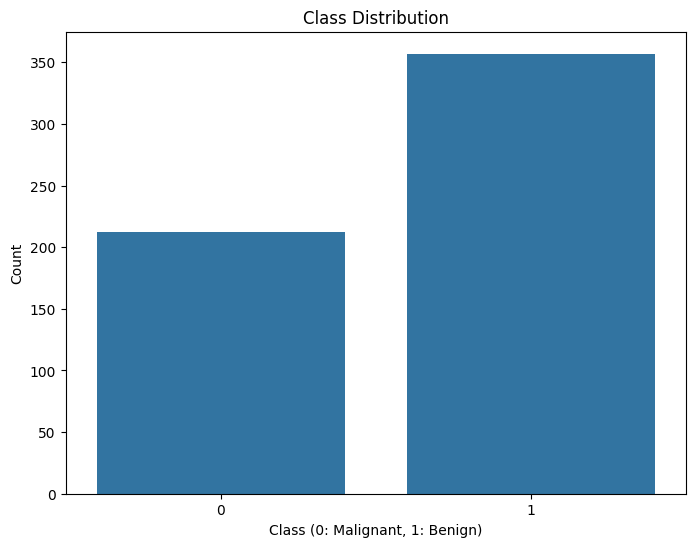

In [ ]:
# Class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Class Distribution')
plt.xlabel('Class (0: Malignant, 1: Benign)')
plt.ylabel('Count')
plt.show()

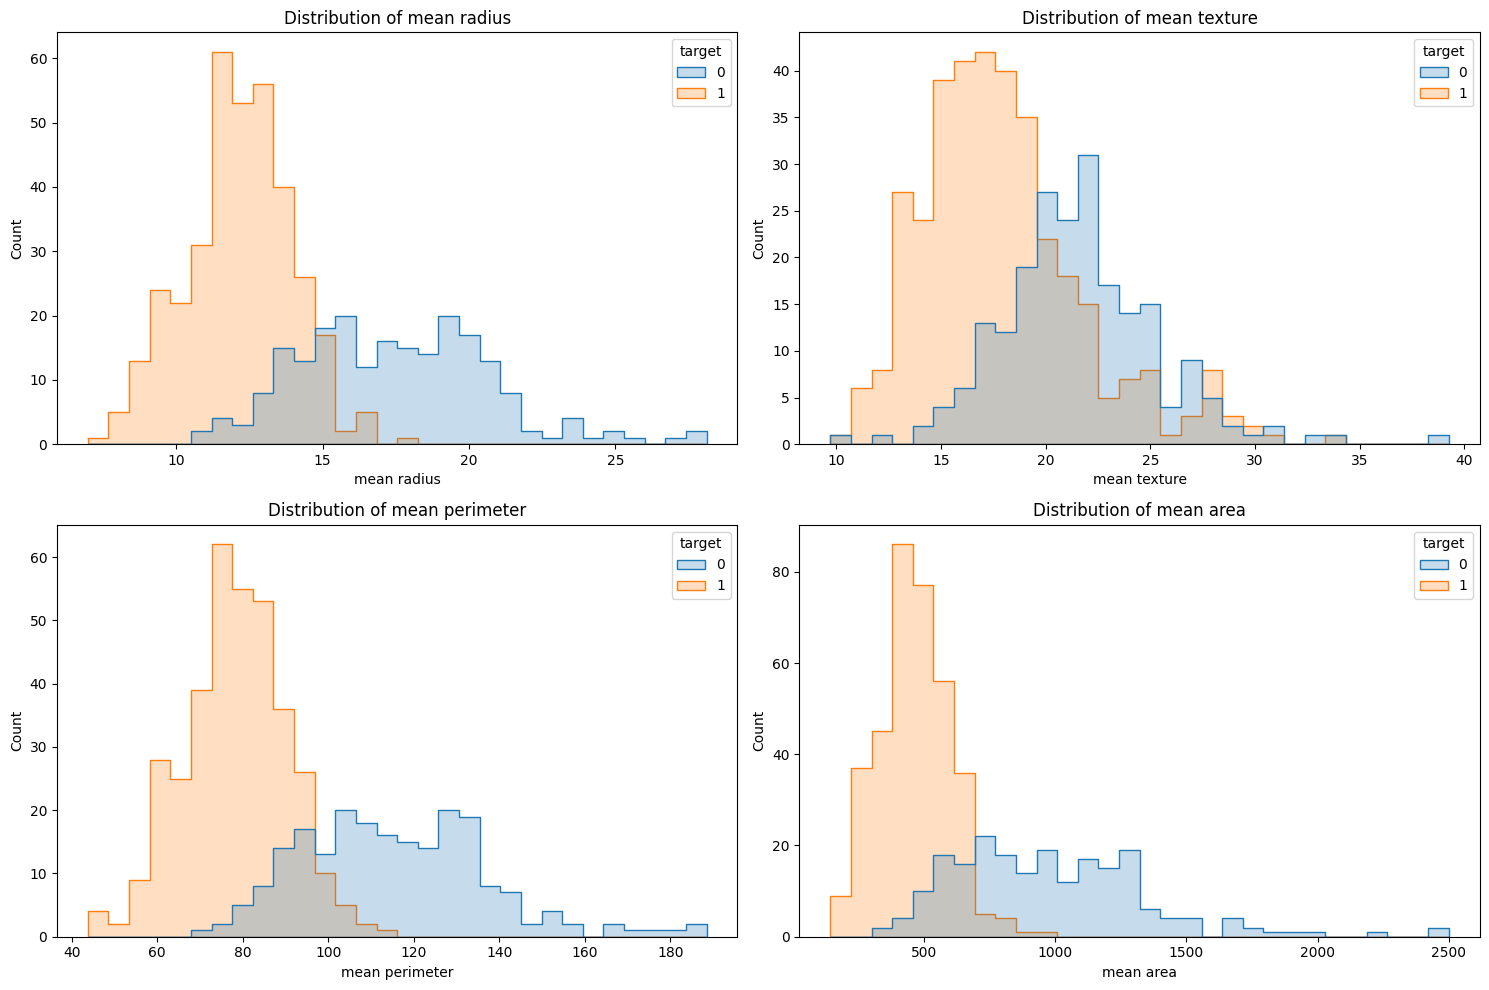

In [ ]:
# Let's explore the distribution of a few important features
features_to_plot = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=X, x=feature, hue=y, element='step', common_norm=False, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

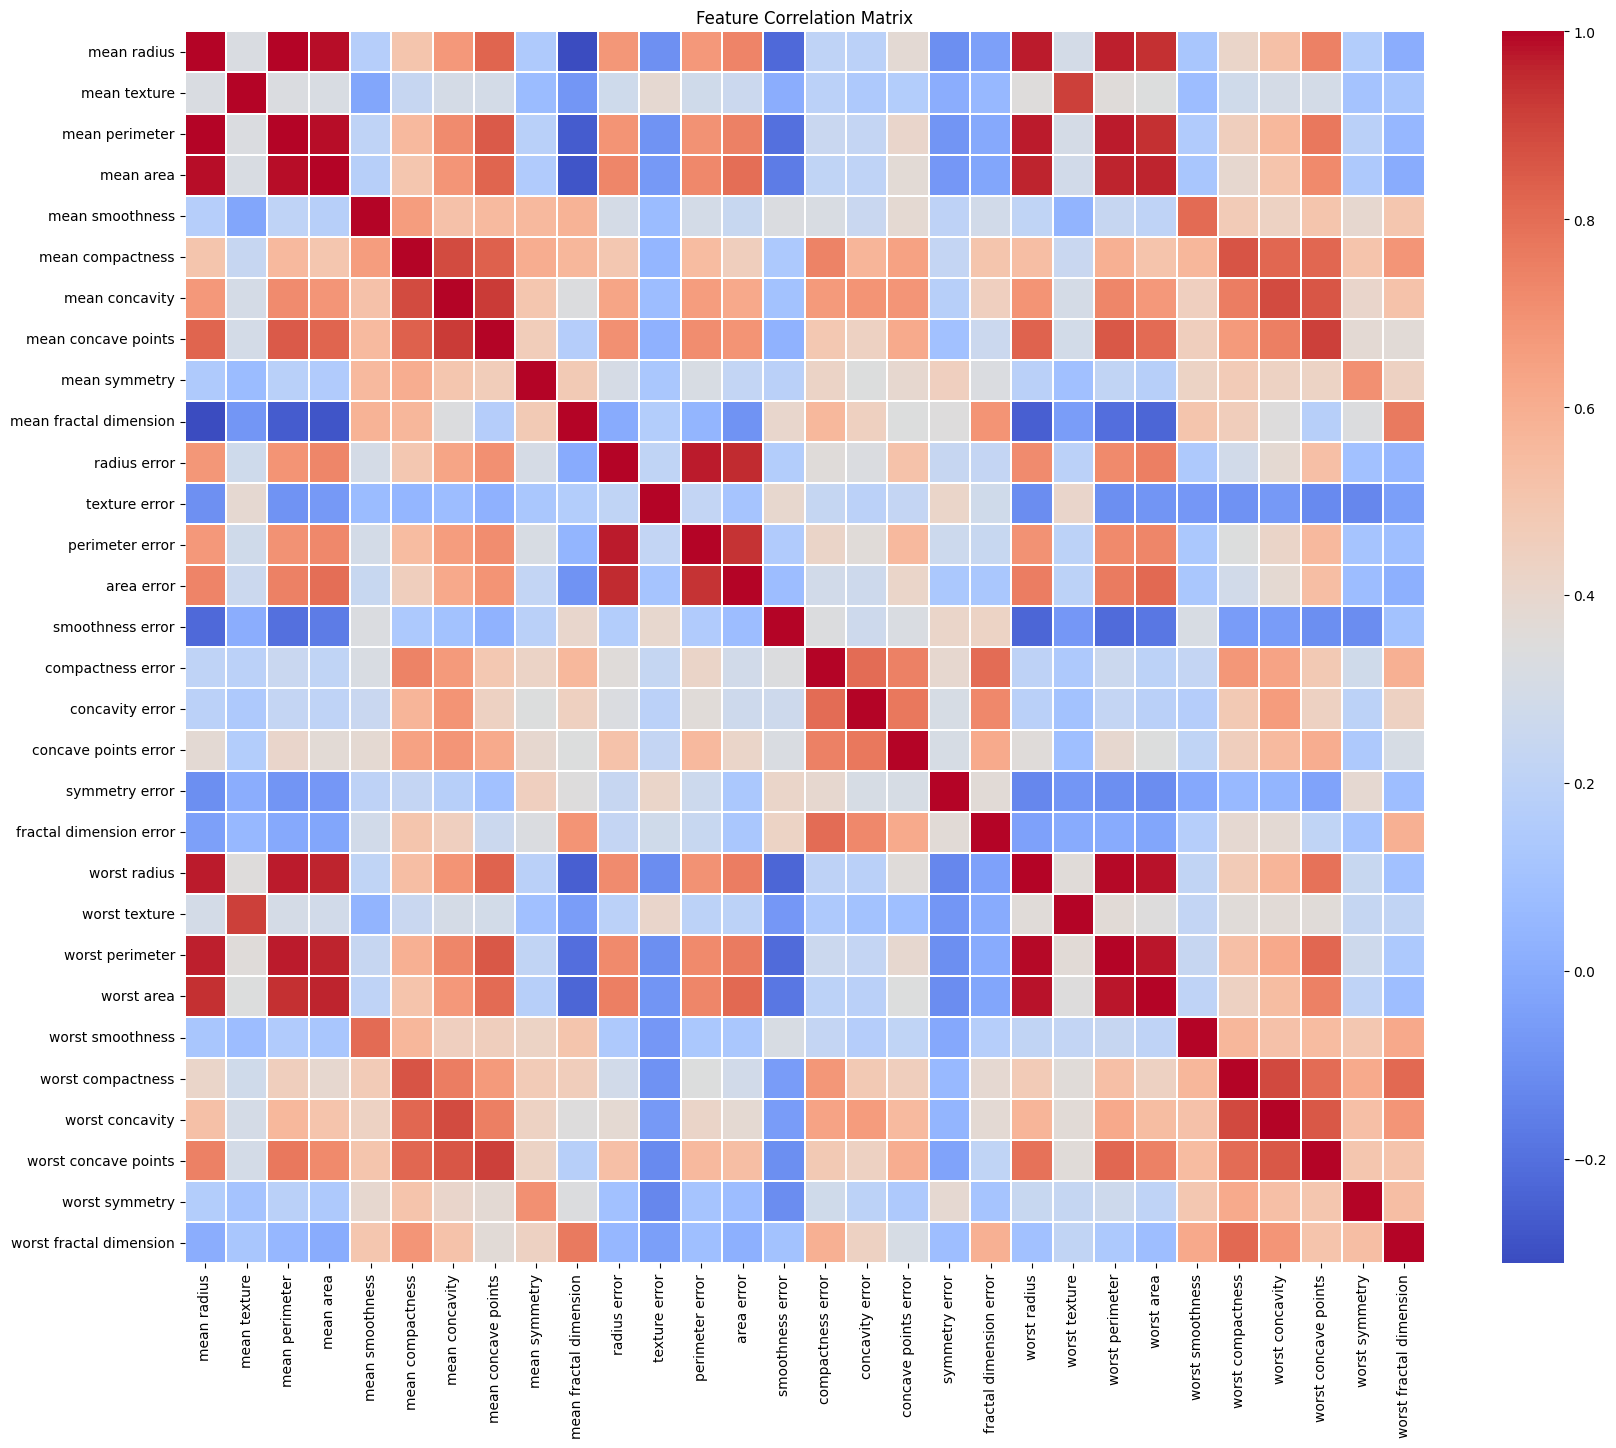

In [ ]:
# Correlation matrix for the features
plt.figure(figsize=(20, 16))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.1)
plt.title('Feature Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## 2. Preprocess and Prepare the Data

Based on our exploration, we noticed that the features have different scales. We should normalize them to ensure that the model doesn't give more weight to features with larger scales.

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows after scaling
X_scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Let's check the distribution after scaling:

In [ ]:
# Basic statistics after scaling
X_scaled_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.153111e-15,-6.568462e-15,-6.993039e-16,-8.553985e-16,6.081447e-15,-1.136369e-15,-2.997017e-16,1.023981e-15,-1.860648e-15,-1.504752e-15,...,-2.297713e-15,1.742016e-15,-1.198807e-15,6.118909e-16,-5.094929e-15,-2.122887e-15,6.118909e-16,-1.998011e-16,-2.422589e-15,2.497514e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


Notice that after scaling, the mean is approximately 0 and standard deviation is 1 for all features.

## 3. Split the Data into Training, Validation, and Test Sets

In machine learning, it's important to have separate datasets for:
- **Training**: Used to fit model parameters
- **Validation**: Used for hyperparameter tuning and to avoid overfitting
- **Testing**: Used to evaluate final model performance on unseen data

We'll use a 70% training, 15% validation, and 15% test split.

In [ ]:
# First split: 70% training, 30% temporary (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Second split: Split the temporary set into validation and test (50% each, which is 15% of the original data each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Print shapes to confirm split sizes
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Check class distribution in each set
print("\nClass distribution:")
print(f"Training set: {pd.Series(y_train).value_counts().to_dict()}")
print(f"Validation set: {pd.Series(y_val).value_counts().to_dict()}")
print(f"Test set: {pd.Series(y_test).value_counts().to_dict()}")

Training set: 398 samples
Validation set: 85 samples
Test set: 86 samples

Class distribution:
Training set: {1: 250, 0: 148}
Validation set: {1: 53, 0: 32}
Test set: {1: 54, 0: 32}


## 4. Train a Simple Logistic Regression Model

Now that our data is prepared, let's train a logistic regression model. This is a simple linear model suitable for binary classification problems. This is more or less the only cell that we need to change when approaching the problem using a deep neural network

In [ ]:
# Initialize logistic regression model
# We'll use balanced class weights since our dataset is somewhat imbalanced
logreg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on validation set
y_val_pred = logreg.predict(X_val)
y_val_pred_prob = logreg.predict_proba(X_val)[:, 1]  # Probability of the positive class

## 5. Evaluate the Model Using Various Metrics

When evaluating the performance of a classification model, especially in tasks where class imbalance is present, we use various metrics beyond just accuracy. Here's a breakdown of the most important ones:

### Confusion Matrix

Before diving into the metrics, it's useful to understand the confusion matrix for binary classification:

|                      | Predicted Positive | Predicted Negative |
|----------------------|--------------------|--------------------|
| **Actual Positive**  | True Positive (TP) | False Negative (FN)|
| **Actual Negative**  | False Positive (FP)| True Negative (TN) |

---

### Accuracy

**Accuracy** measures the overall correctness of the model, i.e., how many predictions it got right.

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- **Good when** the classes are balanced.
- **Bad when** one class dominates (e.g., 95% negative and 5% positive).

---

### Precision

**Precision** (also called Positive Predictive Value) measures how many of the items predicted as positive are actually positive.

$$
\text{Precision} = \frac{TP}{TP + FP}
$$
- **High precision** means few false positives.
- **Useful when** the cost of a false positive is high (e.g., spam filters).

---

### Recall

**Recall** (also called Sensitivity or True Positive Rate) measures how many actual positives were correctly identified.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- **High recall** means few false negatives.
- **Useful when** the cost of a false negative is high (e.g., disease detection).

---

### F1 Score

**F1 Score** is the harmonic mean of precision and recall. It balances both concerns into a single metric.

$$
\text{F1 Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

- **Useful when** you want a balance between precision and recall.
- Especially important in imbalanced datasets.

---

### Summary Table

| Metric     | Best When...                      | Sensitive To...       |
|------------|----------------------------------|------------------------|
| Accuracy   | Classes are balanced              | Class imbalance        |
| Precision  | False positives are costly        | False positives        |
| Recall     | False negatives are costly        | False negatives        |
| F1 Score   | Balance between precision & recall| Both FP and FN         |

In [ ]:
# Calculate various metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_pred_prob)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 0.9765
Precision: 1.0000
Recall: 0.9623
F1 Score: 0.9808
ROC-AUC Score: 1.0000


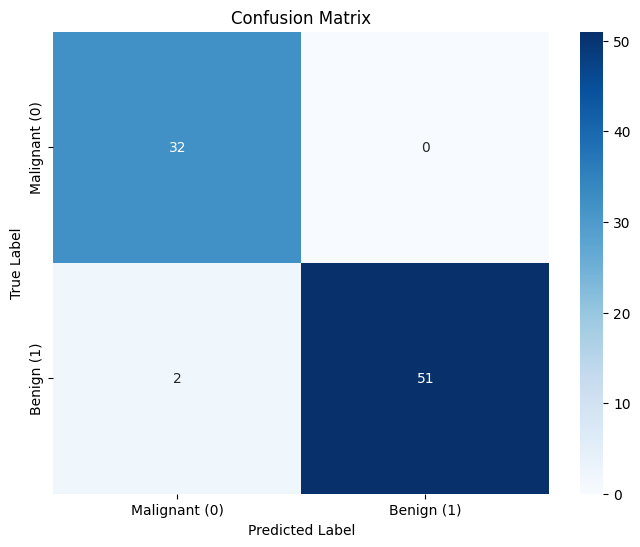

In [ ]:
# Generate and plot confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant (0)', 'Benign (1)'],
            yticklabels=['Malignant (0)', 'Benign (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Display detailed classification report
print(classification_report(y_val, y_val_pred, target_names=['Malignant', 'Benign']))

              precision    recall  f1-score   support

   Malignant       0.94      1.00      0.97        32
      Benign       1.00      0.96      0.98        53

    accuracy                           0.98        85
   macro avg       0.97      0.98      0.98        85
weighted avg       0.98      0.98      0.98        85



## 6. Visualize the Results

Let's create various visualizations to better understand our model's performance.

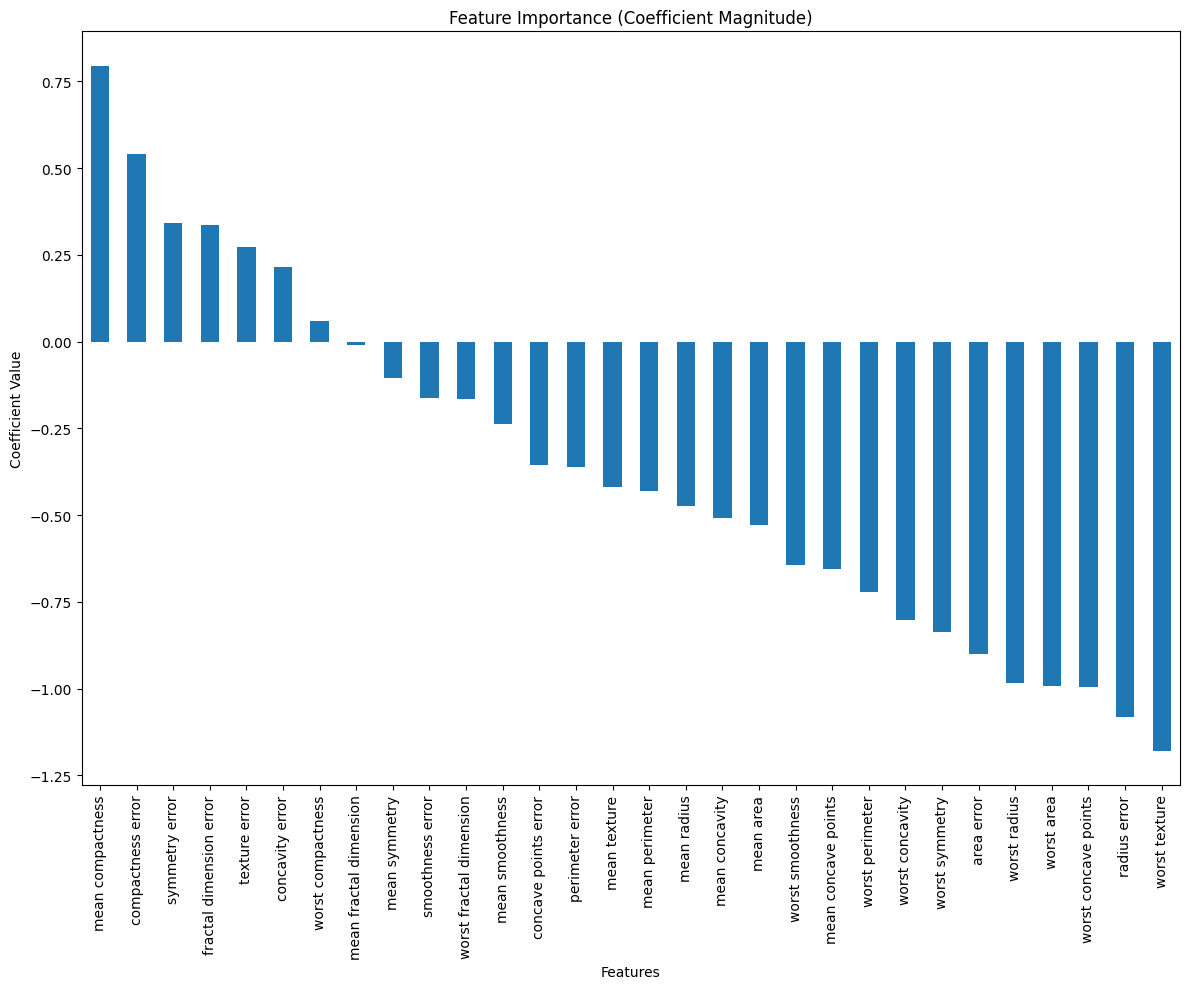

In [ ]:
# Visualize feature importance
coef = pd.Series(logreg.coef_[0], index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(12, 10))
coef.plot(kind='bar')
plt.title('Feature Importance (Coefficient Magnitude)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Decision Boundary Visualization

Let's visualize the decision boundary using the two most important features.

Top two features by coefficient magnitude: ['worst texture', 'radius error']


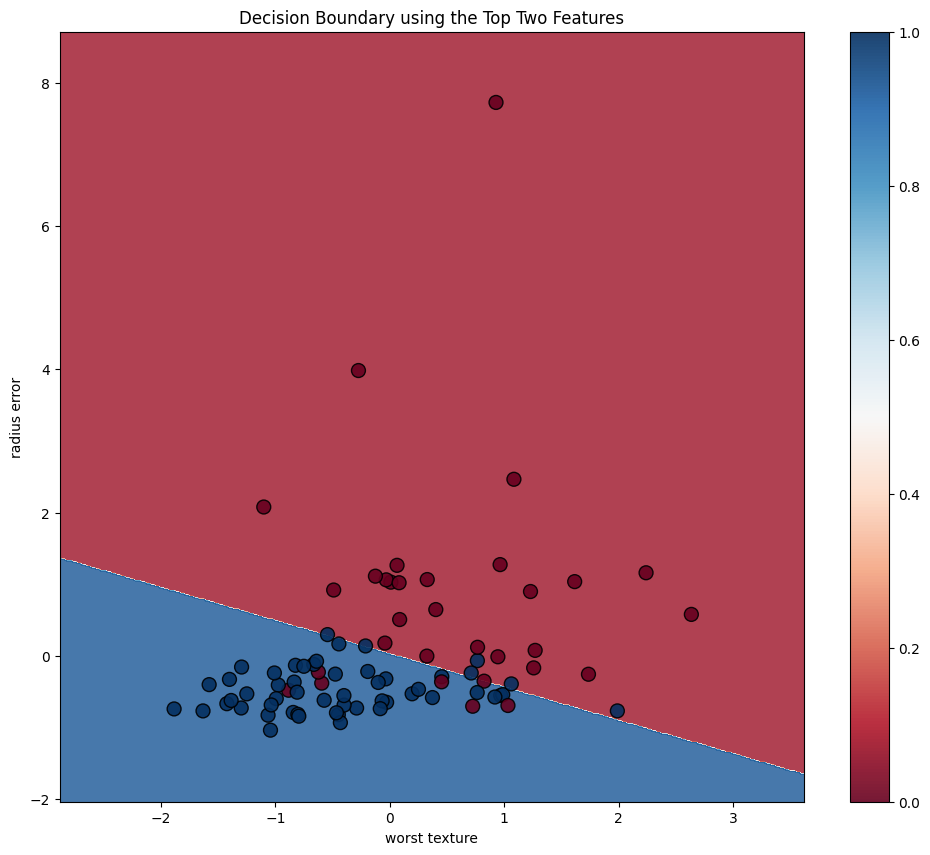

In [ ]:
# Find the two most important features based on coefficient magnitude
top_features_by_coef = coef.abs().sort_values(ascending=False).index[:2].tolist()
print(f"Top two features by coefficient magnitude: {top_features_by_coef}")

# Get indices of these features
feature1_idx = list(X.columns).index(top_features_by_coef[0])
feature2_idx = list(X.columns).index(top_features_by_coef[1])

# Extract these features from validation set
X_val_reduced = X_val[:, [feature1_idx, feature2_idx]]

# Train a new logistic regression model on just these two features
logreg_reduced = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
logreg_reduced.fit(X_train[:, [feature1_idx, feature2_idx]], y_train)

# Create a mesh grid for plotting the decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = X_val_reduced[:, 0].min() - 1, X_val_reduced[:, 0].max() + 1
y_min, y_max = X_val_reduced[:, 1].min() - 1, X_val_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict on the mesh grid
Z = logreg_reduced.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(12, 10))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)

# Plot the validation points
scatter = plt.scatter(X_val_reduced[:, 0], X_val_reduced[:, 1], c=y_val,
                     s=100, alpha=0.9, edgecolor='k', cmap=plt.cm.RdBu)

plt.xlabel(top_features_by_coef[0])
plt.ylabel(top_features_by_coef[1])
plt.title(f'Decision Boundary using the Top Two Features')
plt.colorbar(scatter)
plt.show()

## 7. Final Model Evaluation on Test Set

Now let's evaluate our model on the test set to get a final unbiased estimate of its performance.

Test Set Performance Metrics:
Accuracy: 0.9535
Precision: 0.9808
Recall: 0.9444
F1 Score: 0.9623
ROC-AUC Score: 0.9948


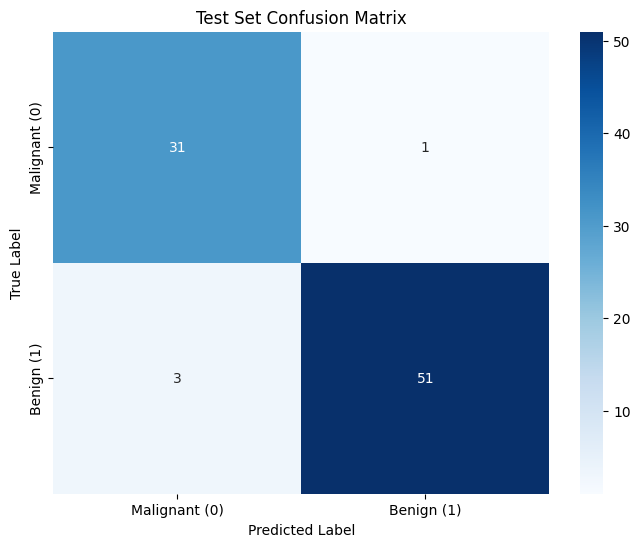

In [ ]:
# Make predictions on the test set
y_test_pred = logreg.predict(X_test)
y_test_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Calculate metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred_prob)

# Print results
print("Test Set Performance Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1 Score: {test_f1:.4f}")
print(f"ROC-AUC Score: {test_roc_auc:.4f}")

# Test set confusion matrix
test_conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Malignant (0)', 'Benign (1)'],
            yticklabels=['Malignant (0)', 'Benign (1)'])
plt.title('Test Set Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## 8. Conclusion

In this notebook, we successfully implemented a complete machine learning pipeline:

1. **Data Exploration**: We loaded and explored the Breast Cancer Wisconsin dataset, examining its structure and distributions.
2. **Data Preprocessing**: We standardized the features to ensure they're on the same scale.
3. **Data Splitting**: We divided our data into training, validation, and test sets to properly evaluate our model.
4. **Model Training**: We trained a simple logistic regression model to classify breast cancer cases as malignant or benign.
5. **Model Evaluation**: We evaluated our model using various metrics like accuracy, precision, recall, F1 score, and ROC-AUC.
6. **Results Visualization**: We created visualizations to better understand our model's performance and the dataset.
7. **Final Testing**: We confirmed the model's generalization ability with the held-out test set.

### Insights
- Even a simple logistic regression model can achieve good performance on this medical classification task.
- The model achieved high accuracy, indicating it can reliably distinguish between malignant and benign cases in many instances.
- Feature importance analysis gives us insights into which physical characteristics of cell nuclei are most predictive of malignancy.

### Next Steps
In future notebooks, we'll build upon this foundation by:
- Implementing neural network models
- Comparing the performance of different model architectures
- Practicing hyperparameter tuning for model optimization

## 9. Exercises for Students

1. Try using different scaling methods (e.g., MinMaxScaler) and observe if there's any change in model performance.
2. Implement a grid search to find optimal hyperparameters for the logistic regression model.
3. Select the top 10 most important features and retrain the model. Does the performance change significantly?
4. Experiment with different train/validation/test splits. How does it affect the results?
5. Try a different classification algorithm (e.g., Random Forest or SVM) and compare its performance with logistic regression.